In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#__author__ = 'Prakhar MISRA'
# Created 8/18/2019
#Last edit 8/18/2010

'''# Purpose: this code will plot the trend of R estimated based on EC values and comapre ith with R observed '''

#Contents:
# 1. cosnider 10km, 20km, 30km radius neughborhood of the central pixel
# 2. count pixels greater than a threshold.
# 3. save this information at daily level and the annual level

# NOTE
# only plotfrp_annual, plotfrp_annual_bymonth works, linkis for aother functins are broken


import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
from datetime import timedelta, date
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import os

currdir = os.getcwd()

In [9]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
ind_city = ['Agra', 'Ahmedabad', 'Allahabad', 'Amritsar1_3', 'Chennai', 'Firozabad', 'Gwalior', 'Jodhpur',
            'Kanpur', 'Lucknow', 'Ludhiana', 'Patna', 'Raipur', 'Hyderabad', 'Jaipur', #'Dehradun',
            'Bangalore', 'Kolkata', 'NewDelhi', 'Mumbai']

# file that has the deduced EC values as well as their stndard edviation
fit_value_file = os.path.join(currdir, "lib",  "AQmodel", "fitmodel", "Model_city_tier", "IDW20180210", "allAY20180210IDWsetfit_20190819.csv")
                              
# originally df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2setfit.csv")


In [19]:
def plotfuncallyear(citychk):


    df_city = df_cityfit[df_cityfit.citychk_loc == citychk]

    start_date = date(2000, 12, 30)
    end_date = date(2016, 1, 1)

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df_city.R_obs, color="blue", lw=1, alpha=0.6, label="R$_{obs}$", marker = '+')
    ax.plot(df_city.R_est, color="red", lw=3, alpha=0.8, label="R$_{est}$",  marker = 'o')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.set_xlabel("Year", fontsize=18)
    ax.set_ylabel("R", fontsize=18)
    ax.set_ylim(0, 90)
    ax.set_xlim(start_date, end_date)

    plt.legend(fontsize=18)
    #plt.close()
    plt.savefig(os.path.join(currdir,"plots", "AQmodel", "Restimate",  citychk + ".png"))


    print (citychk + ", allyears , allseason, " +str(np.corrcoef(df_city.R_obs, df_city.R_est)[1,0]) +","+ str(sqrt(mean_squared_error(df_city.R_obs, df_city.R_est))))
    newdf = df_city[df_city.month.isin([1,2,3,4,5,6,10,11,12])]
    print (citychk + ", allyears , norain, " + str(np.corrcoef(newdf.R_obs, newdf.R_est)[1, 0]) +","+ str(sqrt(mean_squared_error(newdf.R_obs, newdf.R_est))))







def plotfunc(citychk, year):

    df_city = df_cityfit[df_cityfit.year == year]
    df_city = df_city[df_city.citychk_loc == citychk]


    start_date = date(year-1, 12, 30)
    end_date = date(year+1, 1, 1)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(df_city.R_obs, color="blue", lw=1, alpha=0.6, label="R$_{obs}$",  marker = '+')
    ax.plot(df_city.R_est, color="red", lw=3, alpha=0.8, label="R$_{est}$",  marker = 'o')
    #ax.xaxis.set_major_locator(months)

    ax.set_xlabel("Year", fontsize=18)
    ax.set_ylabel("R (unitless)", fontsize=18)
    ax.set_ylim(0, 90)
    ax.set_xlim(start_date, end_date)
    plt.legend(fontsize=18)
    #plt.close()
    plt.savefig(os.path.join(currdir,"plots" ,"AQmodel", "Restimate", citychk + str(year)+ ".png"))
    print (citychk + "," +str(year)+", allseason, " +str(np.corrcoef(df_city.R_obs, df_city.R_est)[1,0]) +","+  str(sqrt(mean_squared_error(df_city.R_obs, df_city.R_est))))
    newdf = df_city[df_city.month.isin([1,2,3,4,5,6,10,11,12])]
    print (citychk + "," +str(year)+", norain, " + str(np.corrcoef(newdf.R_obs, newdf.R_est)[1, 0]) +","+ str(sqrt(mean_squared_error(newdf.R_obs, newdf.R_est))))



def plotmonthly(citychk):

    fig, ax = plt.subplots(3, 4, figsize=(15, 6))
    monthlist = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul" ,"Aug", "Sep", "Oct", "Nov", "Dec", ]

    for month in [1,2,3,4,5,6,7,8,9,10,11,12]:

        df_city = df_cityfit[df_cityfit.month == month]
        df_city = df_city[df_city.citychk_loc == citychk]


        start_date = date(2000, 12, 30)
        end_date = date(2016, 1, 1)

        r = int((month-1)/4)
        c = (month-1)%4
        ax[r,c].plot(df_city.R_obs, color="blue", lw=1, alpha=0.6, label="R$_{obs}$", marker = '+')
        ax[r,c].plot(df_city.R_est, color="red", lw=3, alpha=0.8, label="R$_{est}$", marker = 'o')
        ax[r,c].set_xlabel(monthlist[month-1], fontsize=18)
        ax[r,c].set_ylabel("R (unitless)", fontsize=18)
        ax[r,c].set_ylim(0, 90)
        ax[r,c].set_xlim(start_date, end_date)
        #fig.autofmt_xdate()
        plt.xticks(fontsize=10, rotation=45)
        #plt.legend(fontsize=18)
        plt.tight_layout()


    plt.savefig(os.path.join(currdir,"plots", "AQmodel", "Restimate", citychk + str(month)+ ".png"))

Agra, allyears , allseason, 0.47736904836247473,13.283580649152015
Agra, allyears , norain, 0.5158766346553503,12.91075250779265
Agra,2001, allseason, 0.1417913919829767,8.645062167787687
Agra,2001, norain, 0.1765602568149105,9.84742286262854
Agra,2011, allseason, 0.09149126522267106,18.01698415917653
Agra,2011, norain, 0.40653910716688035,14.005391369224586
Ahmedabad, allyears , allseason, -0.004901563451028206,14.819335019089449
Ahmedabad, allyears , norain, 0.20529895914193835,8.155808068195352
Ahmedabad,2001, allseason, -0.687678801841154,10.94108319239769
Ahmedabad,2001, norain, -0.7881010353816297,12.269876428502965
Ahmedabad,2011, allseason, -0.1422875136384685,18.641481253135108
Ahmedabad,2011, norain, -0.6807787984445572,9.410120739473676
Allahabad, allyears , allseason, 0.46662154148156404,13.617032282083166
Allahabad, allyears , norain, 0.28805623528611923,13.59762601811035
Allahabad,2001, allseason, 0.11169940826995087,8.74555866902407
Allahabad,2001, norain, 0.145382372459

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Firozabad, allyears , allseason, -0.03320766375414601,31.043496425184724
Firozabad, allyears , norain, -0.25225052073146975,32.56035989769994
Firozabad,2001, allseason, 0.09913215819589849,23.23526591430071
Firozabad,2001, norain, 0.049469874990368,23.902149037448954


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Firozabad,2011, allseason, 0.08323279930283563,34.6439937837479
Firozabad,2011, norain, -0.038560390964700396,33.88322853405044


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Gwalior, allyears , allseason, 0.33897365884569336,17.533054855667537
Gwalior, allyears , norain, 0.035247347868796915,18.5218631588973
Gwalior,2001, allseason, -0.05644153468932648,14.849072049470987
Gwalior,2001, norain, -0.41911591245409346,15.201687584909067


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Gwalior,2011, allseason, 0.2874455610127235,20.468907450620325
Gwalior,2011, norain, 0.04395593752169415,16.016839215038402


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Jodhpur, allyears , allseason, -0.5388131183333319,14.66452840938575
Jodhpur, allyears , norain, -0.5855560608407311,12.501357499280065
Jodhpur,2001, allseason, -0.683711434287987,9.068701772554645
Jodhpur,2001, norain, -0.8230481314411373,8.537821307816175


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Jodhpur,2011, allseason, -0.6170254464149364,19.64635895634824
Jodhpur,2011, norain, -0.6168936584670647,15.636114526178142


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Kanpur, allyears , allseason, 0.5783221586856124,13.263713286640828
Kanpur, allyears , norain, 0.3518483375539868,11.743949246104922
Kanpur,2001, allseason, 0.3878645143857674,9.121087965351984
Kanpur,2001, norain, 0.5194184668276961,10.408205533753625


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Kanpur,2011, allseason, 0.7529196654362369,15.001634443400887
Kanpur,2011, norain, 0.42562599838477894,10.842066897270191


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Lucknow, allyears , allseason, 0.5289230636571038,14.06356451044694
Lucknow, allyears , norain, 0.4409998146830727,12.454463970939832
Lucknow,2001, allseason, -0.06422297150939625,10.660170589161542
Lucknow,2001, norain, -0.30384517238496,12.229046830176806


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Lucknow,2011, allseason, 0.39996419892797547,11.389407342674968
Lucknow,2011, norain, 0.5847924194422386,9.399136910372953


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Ludhiana, allyears , allseason, 0.14968380227567454,11.929249863046822
Ludhiana, allyears , norain, 0.316492577003469,11.052209752803087


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ludhiana,2001, allseason, -0.23114899912117695,8.63126900778555
Ludhiana,2001, norain, 0.15282292771934478,9.686156394726854
Ludhiana,2011, allseason, 0.04698067173571313,13.666468490719538
Ludhiana,2011, norain, 0.13624080132562166,9.88257405746128


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

Patna, allyears , allseason, 0.6622051114613029,14.097827956878533
Patna, allyears , norain, 0.5297385336681735,13.995409804602534
Patna,2001, allseason, 0.510518444529677,10.46933279928097
Patna,2001, norain, 0.5024658588022861,11.55190130177364


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Patna,2011, allseason, 0.7953524452976412,14.417929504255836
Patna,2011, norain, 0.7791703338712468,13.348423022690799


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Raipur, allyears , allseason, 0.32793896128761485,12.44041937316226
Raipur, allyears , norain, 0.5710431196212657,8.615736535039275
Raipur,2001, allseason, -0.0496523483761482,6.6956804588415775
Raipur,2001, norain, 0.3550775784900103,6.6122441469871704


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Raipur,2011, allseason, 0.46139897135938396,11.019724600705189
Raipur,2011, norain, 0.44689292537358294,6.454741050108332


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Hyderabad, allyears , allseason, 0.39260793811715716,6.409401766445292
Hyderabad, allyears , norain, 0.5675041263347803,4.961752470464658


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Hyderabad,2001, allseason, -0.17402706467901044,4.526349124146148
Hyderabad,2001, norain, 0.09117988373976577,3.497559796807262
Hyderabad,2011, allseason, -0.4234673586004618,6.065304983363462
Hyderabad,2011, norain, -0.7497198476122486,5.694144635183391


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.m

Jaipur, allyears , allseason, -0.05039093582009112,12.900990177765319
Jaipur, allyears , norain, -0.06117512960815463,11.193722397657067
Jaipur,2001, allseason, -0.5415659753302869,10.239815474286834
Jaipur,2001, norain, -0.7021523386224535,10.560119861530321


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Jaipur,2011, allseason, -0.4560096936005609,17.900853720921067
Jaipur,2011, norain, -0.7634069485848002,9.765118938720786


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Bangalore, allyears , allseason, 0.4740316695707188,11.938477951270247
Bangalore, allyears , norain, 0.4954182365392058,10.3146786005997
Bangalore,2001, allseason, 0.48784017603976737,7.248697100640204
Bangalore,2001, norain, 0.685569926468906,8.359787896635485


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Bangalore,2011, allseason, 0.3927622272834793,17.32394155069339
Bangalore,2011, norain, 0.3039778107270009,13.794860079501126


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Kolkata, allyears , allseason, 0.592481457984508,16.5032281575996
Kolkata, allyears , norain, 0.36524817808847465,13.910709393676765
Kolkata,2001, allseason, 0.4581794597889678,13.315999370499533
Kolkata,2001, norain, 0.622754696273736,14.581225782142177


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Kolkata,2011, allseason, 0.6203072906450446,16.775566275811617
Kolkata,2011, norain, -0.24591568765618957,16.69028932448026


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


NewDelhi, allyears , allseason, 0.5785536685695265,12.538580883033385
NewDelhi, allyears , norain, 0.4427634298019613,13.232139004010442
NewDelhi,2001, allseason, 0.6347231817565256,8.096491684829154
NewDelhi,2001, norain, 0.5333033519338691,9.256813031736343


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


NewDelhi,2011, allseason, 0.6928871827861616,12.001745674674492
NewDelhi,2011, norain, 0.6442808428982432,11.411796300439118


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


Mumbai, allyears , allseason, 0.5830420789315741,11.684551799938909
Mumbai, allyears , norain, 0.5104210665457332,7.384312532346951
Mumbai,2001, allseason, 0.6245676179182044,8.156611740105864
Mumbai,2001, norain, 0.7048494119545979,9.160256845207758


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Mumbai,2011, allseason, 0.8104651479060888,14.222747754279604
Mumbai,2011, norain, 0.37480240817042293,8.502622414843236


C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


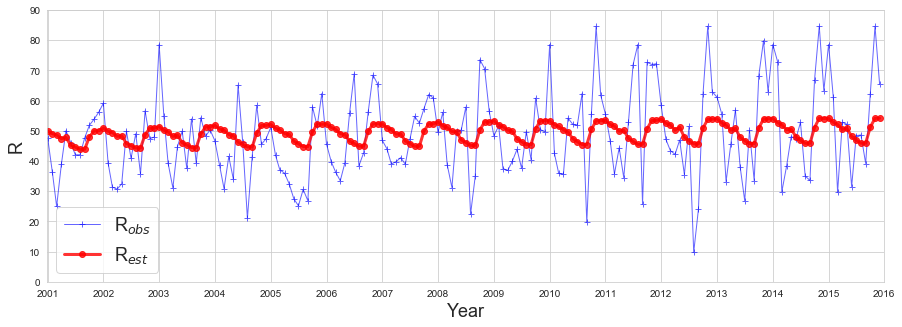

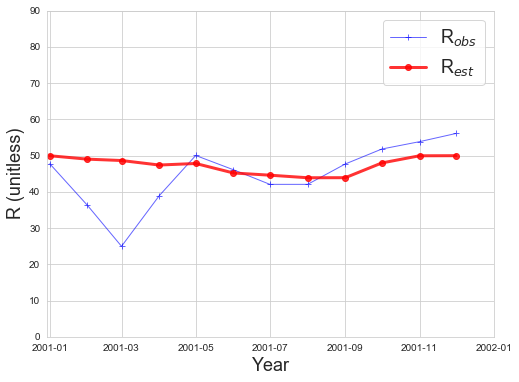

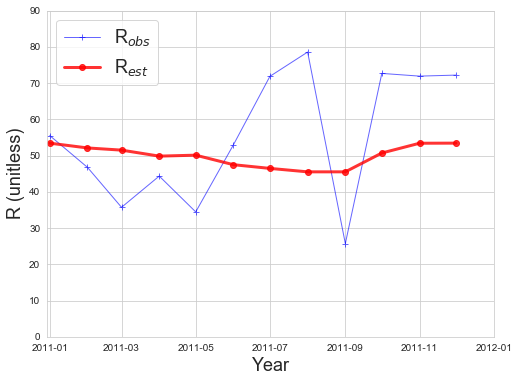

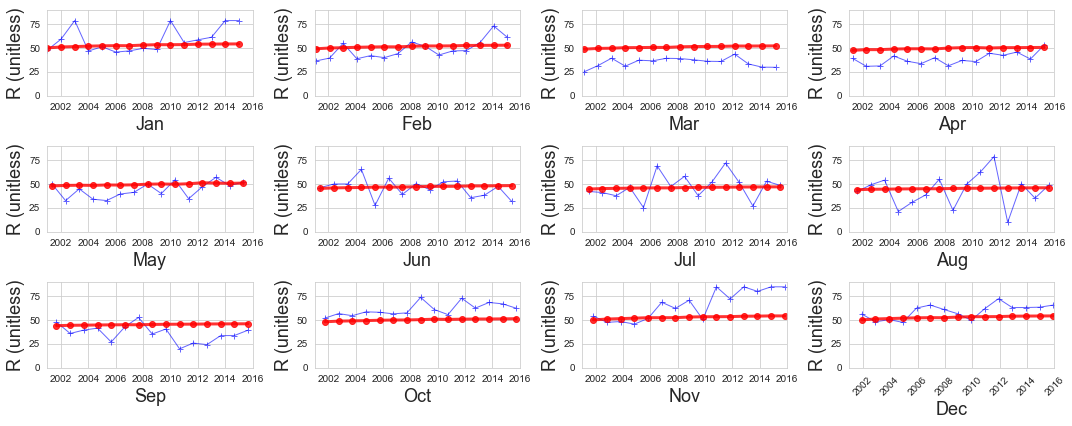

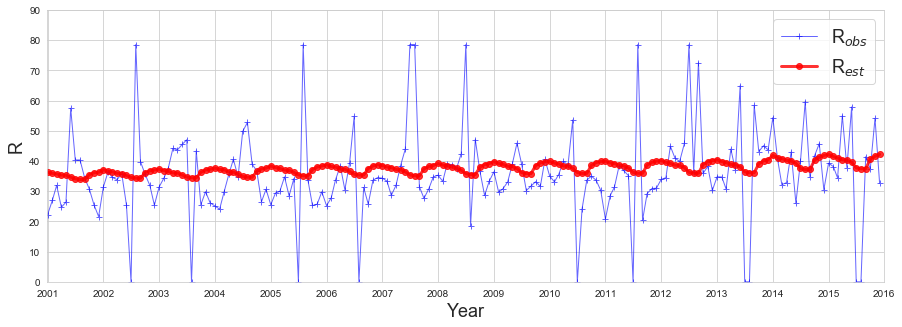

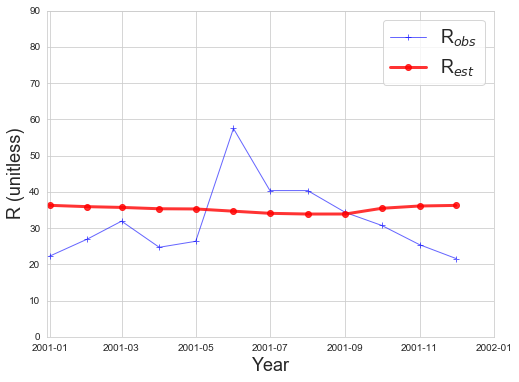

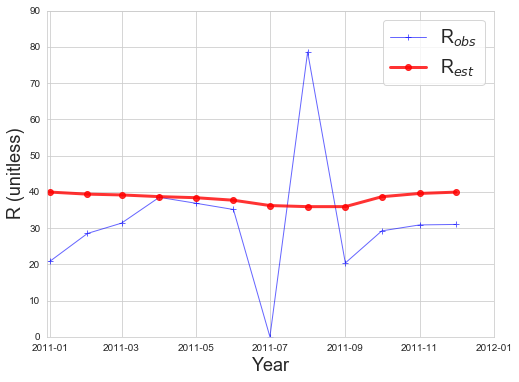

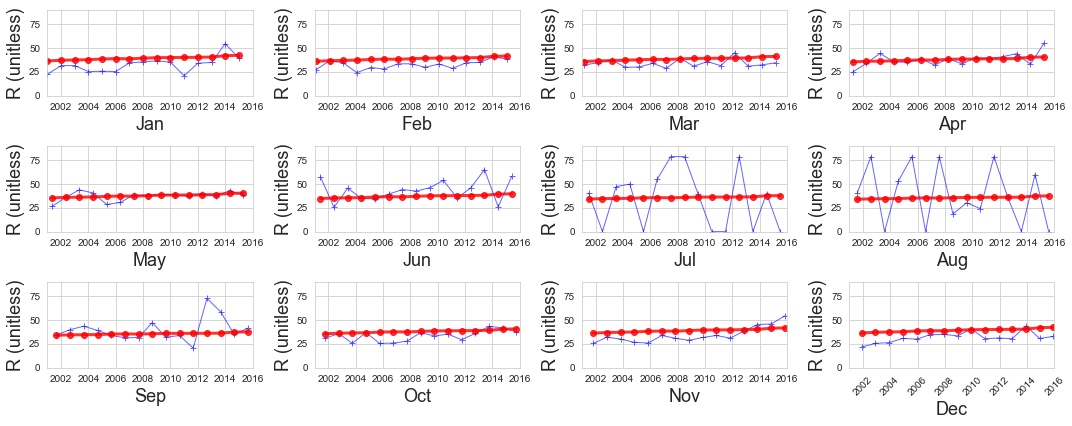

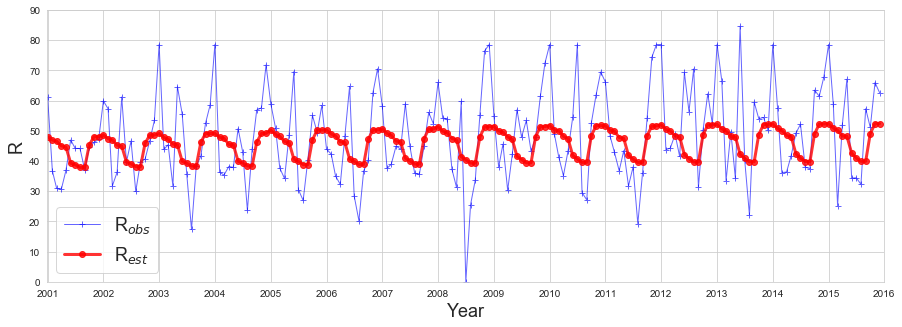

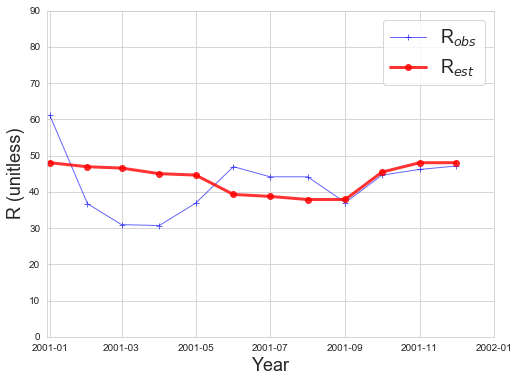

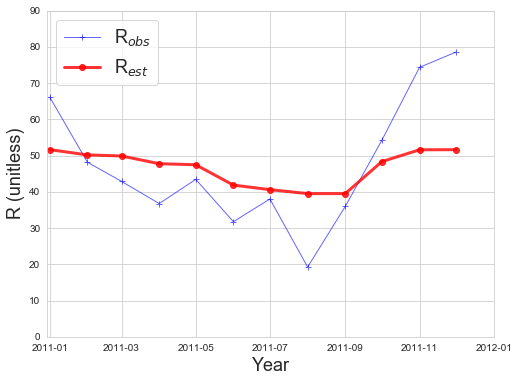

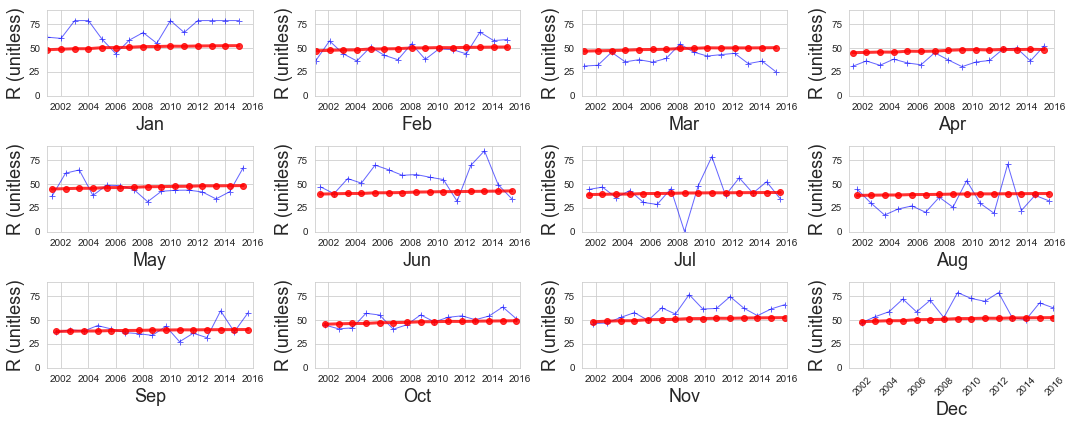

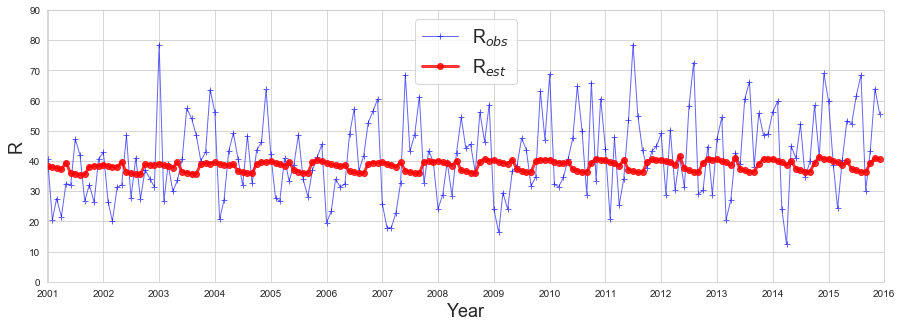

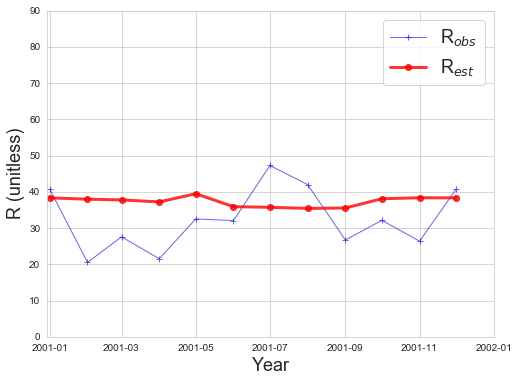

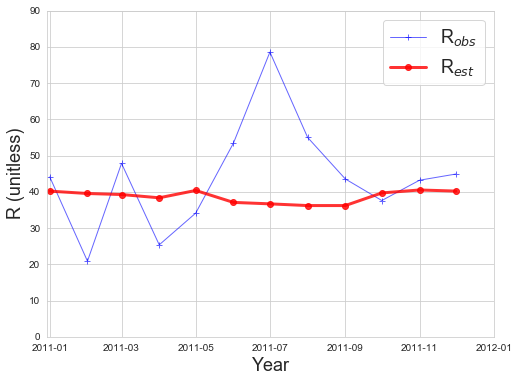

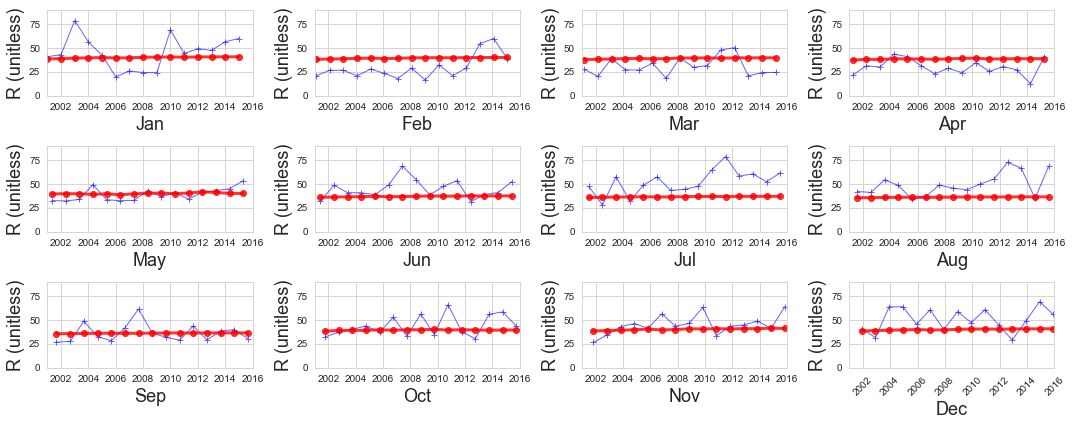

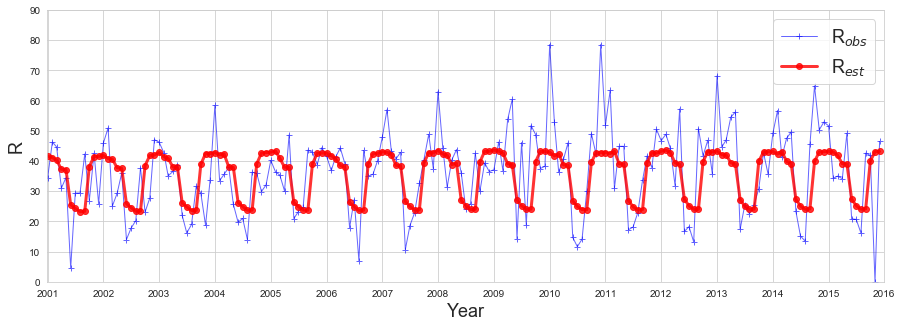

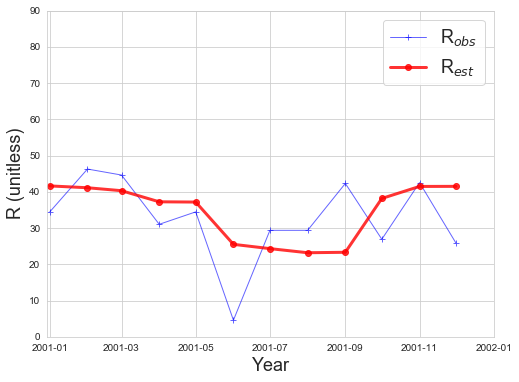

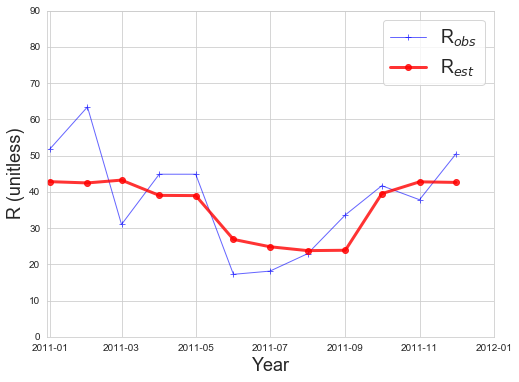

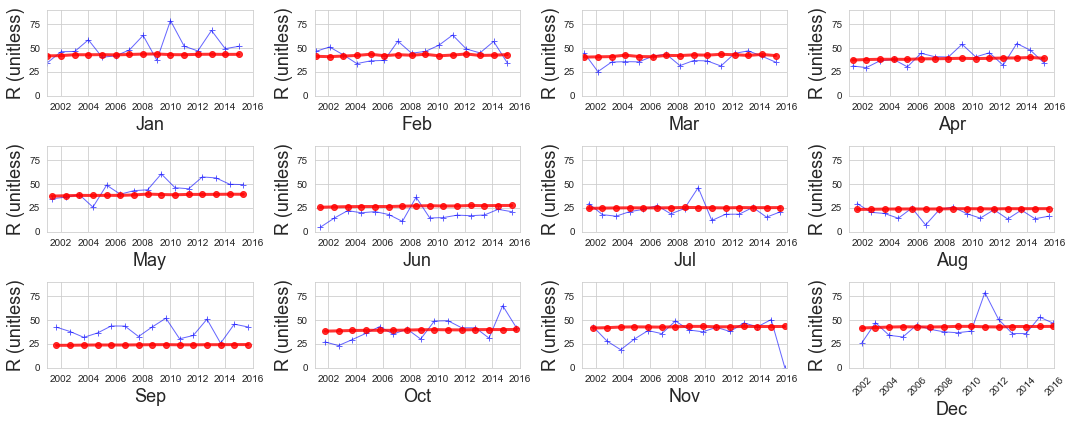

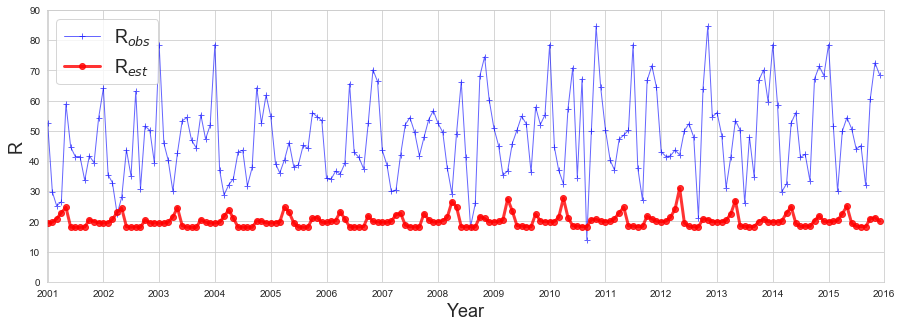

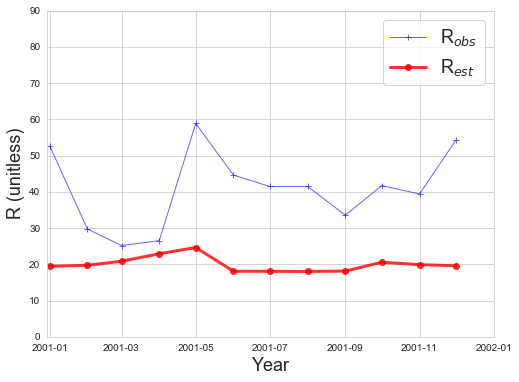

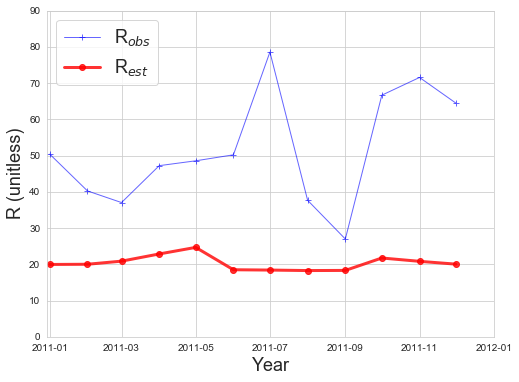

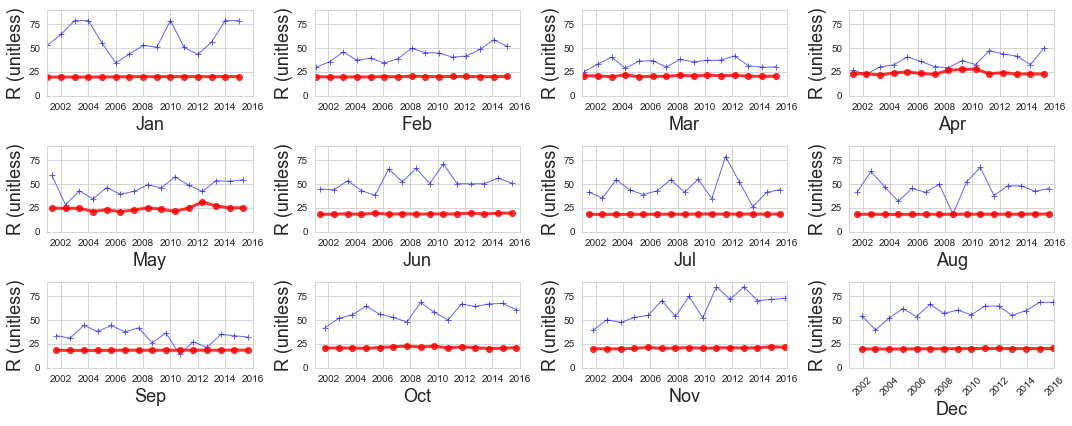

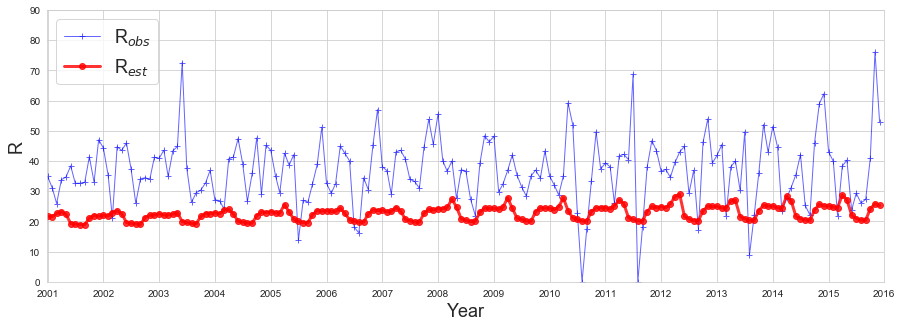

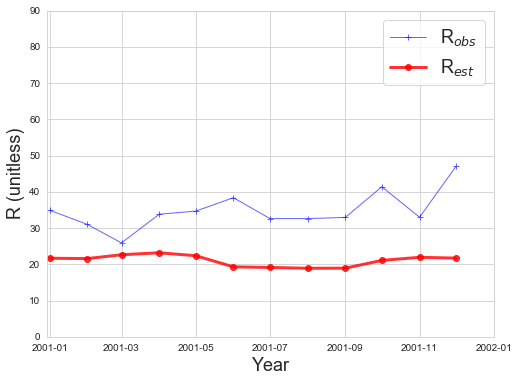

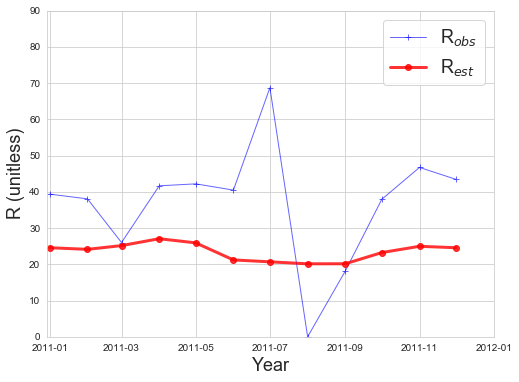

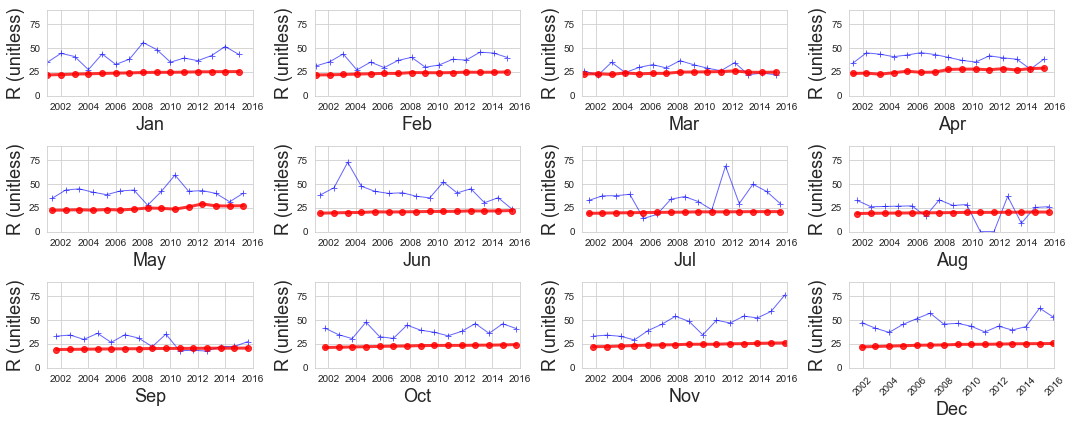

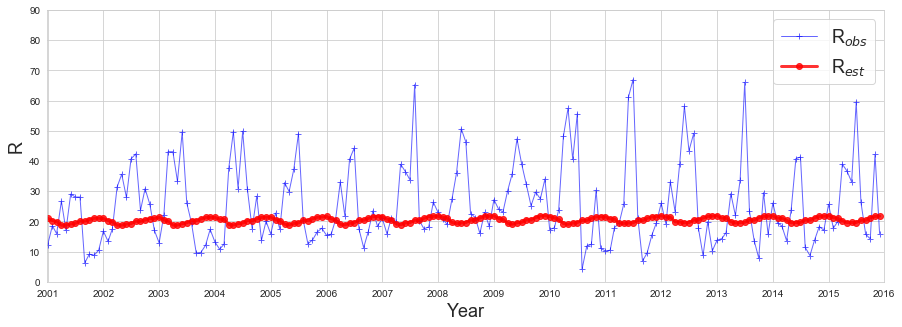

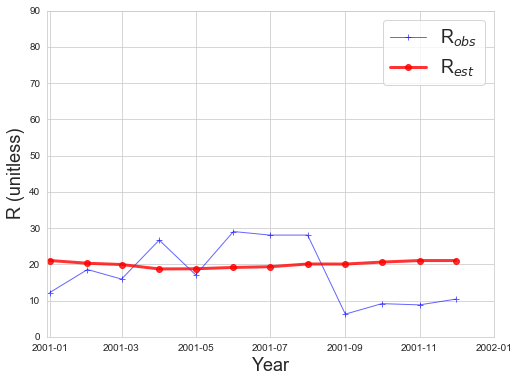

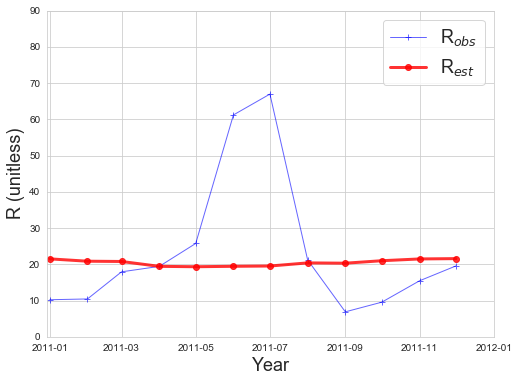

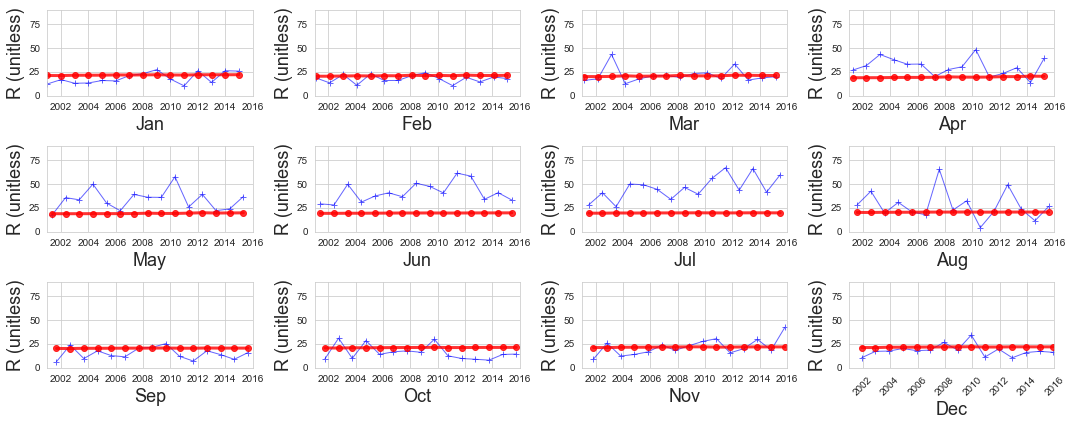

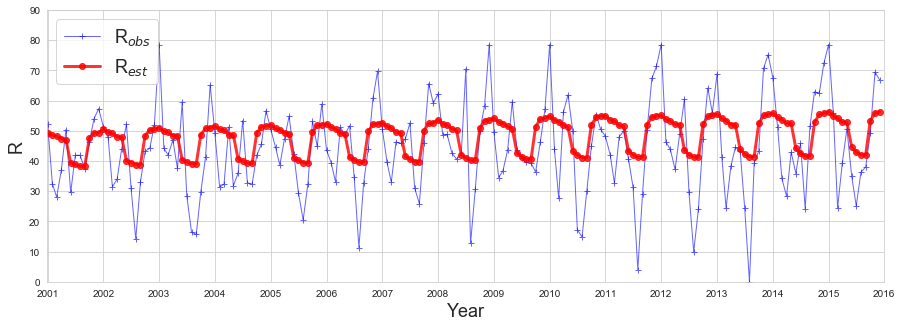

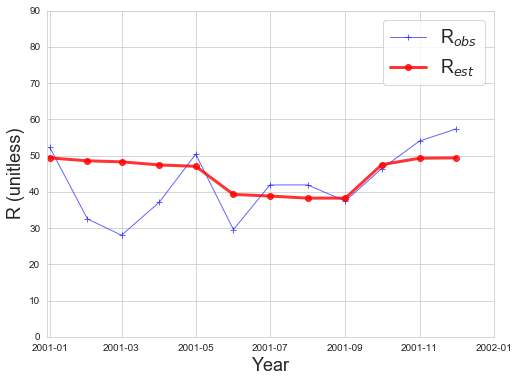

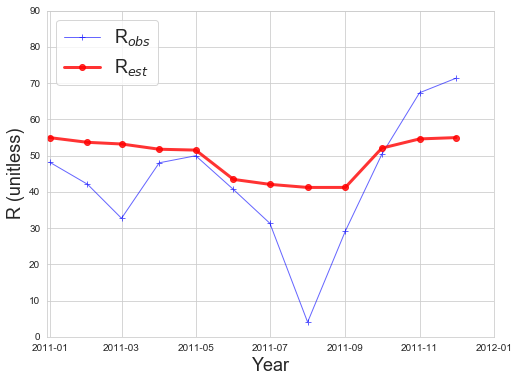

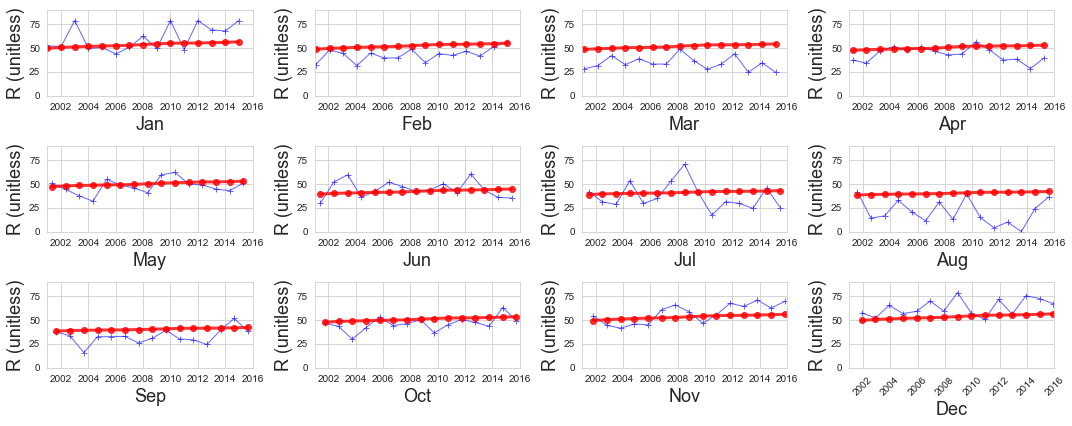

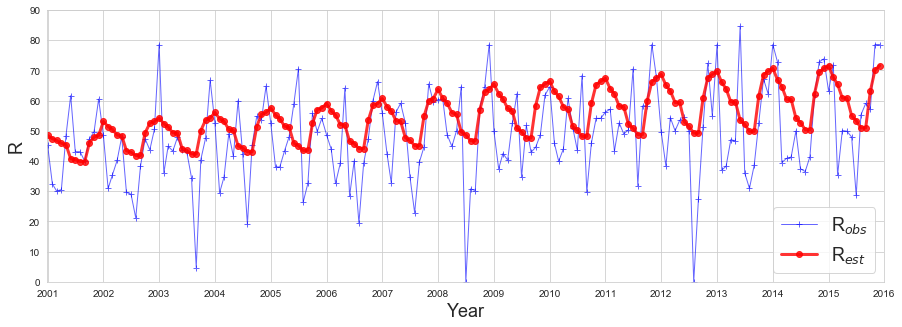

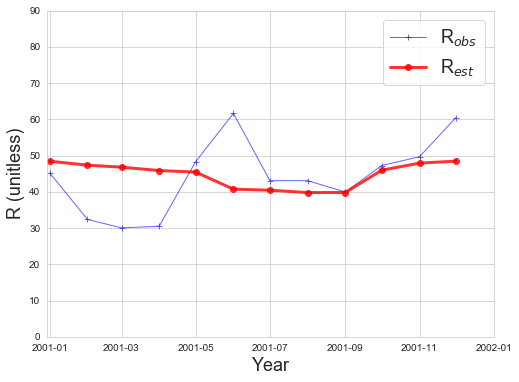

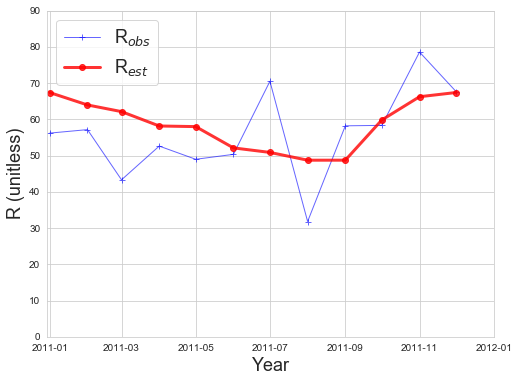

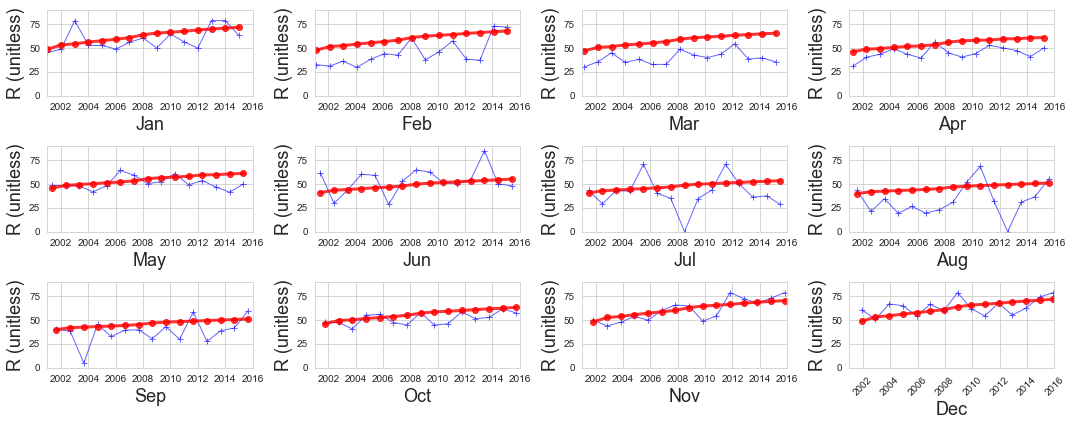

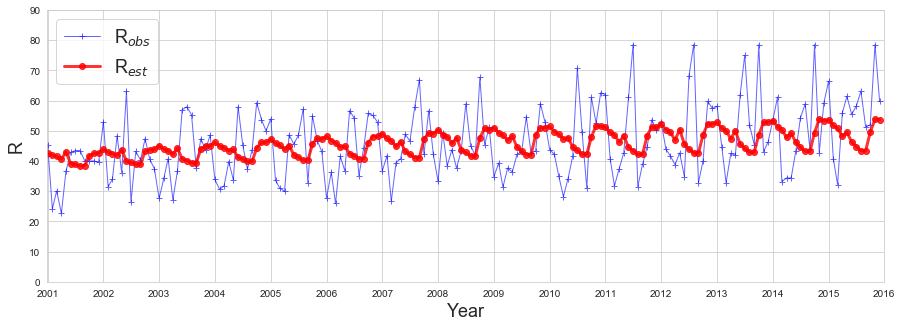

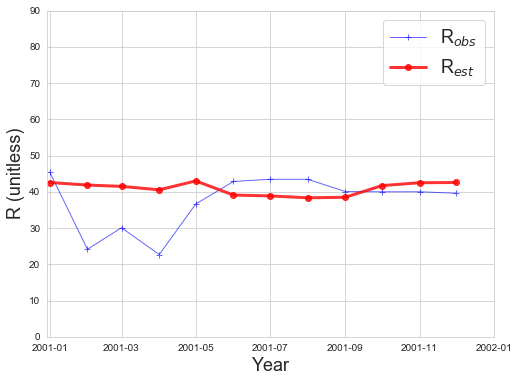

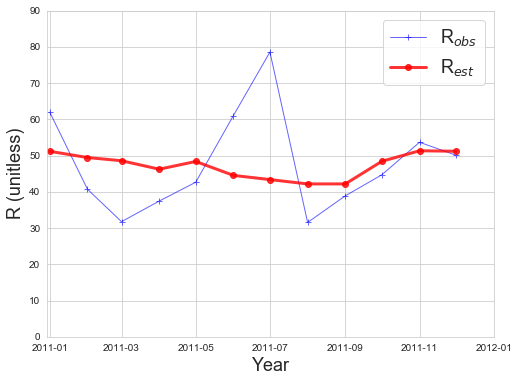

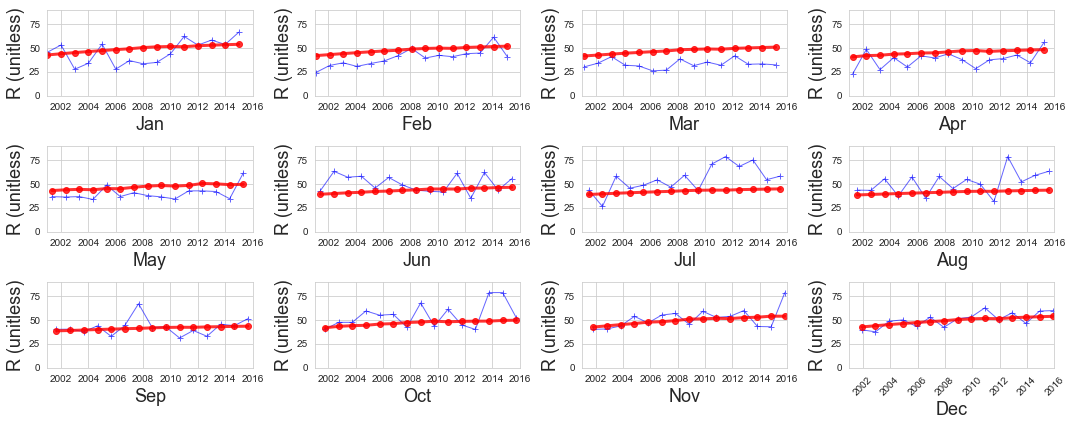

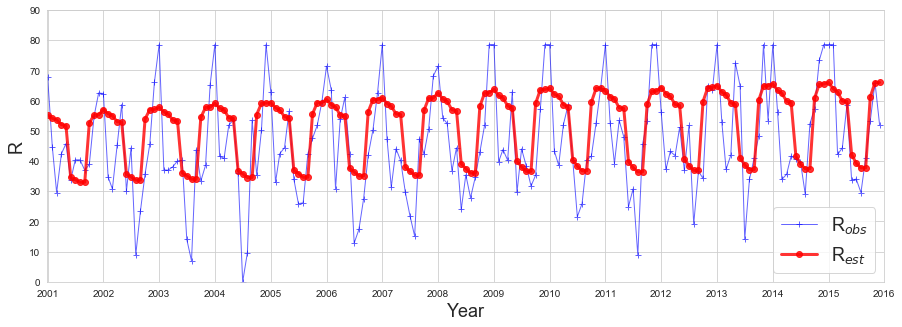

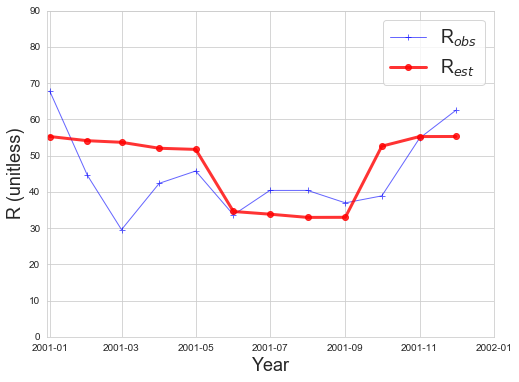

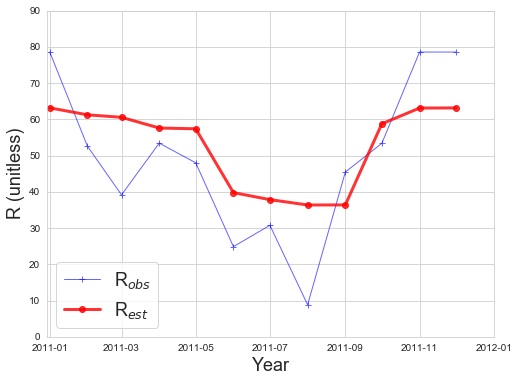

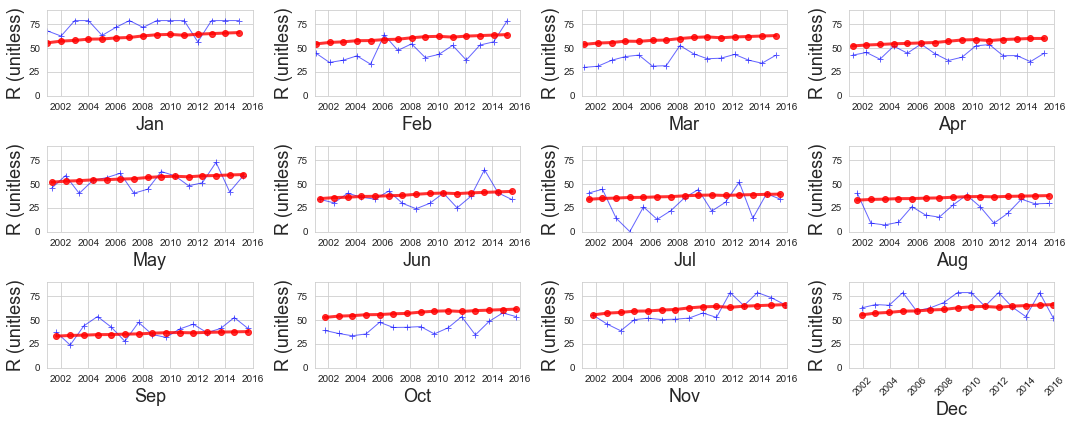

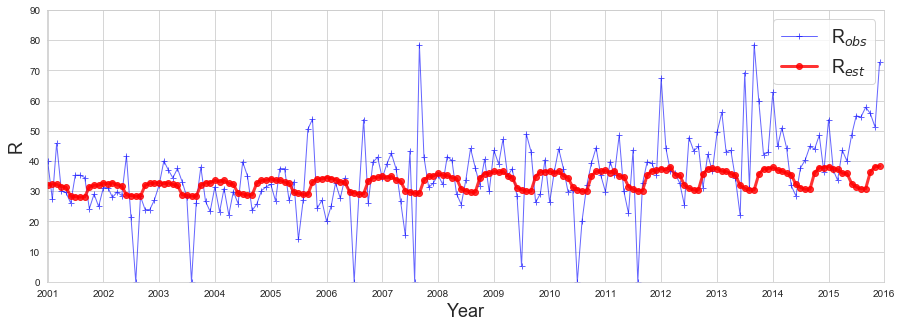

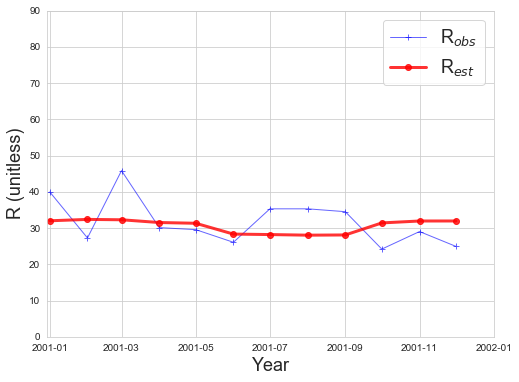

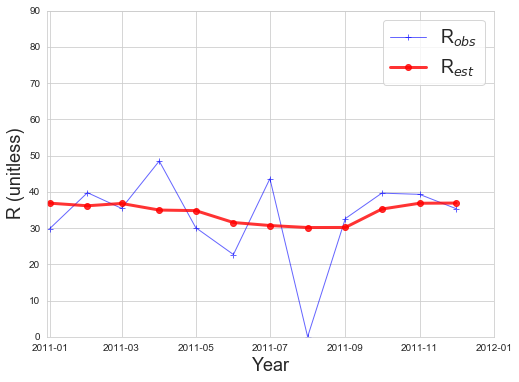

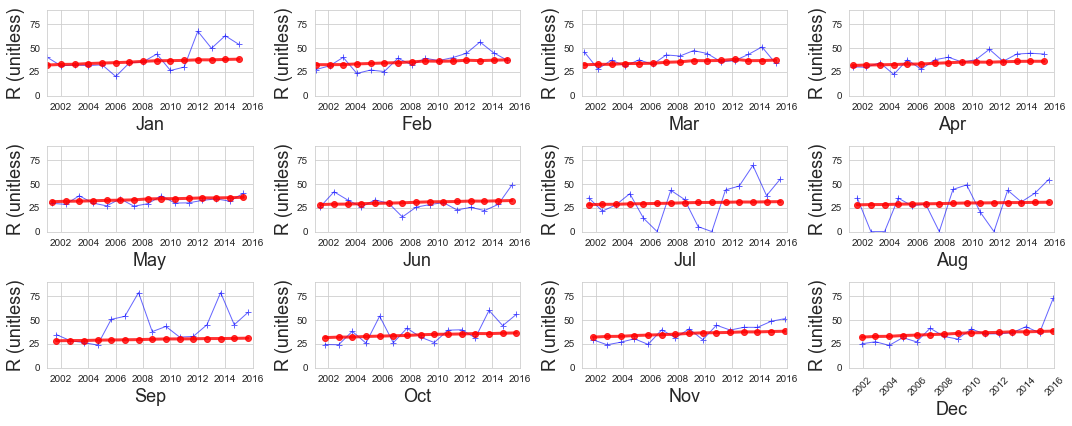

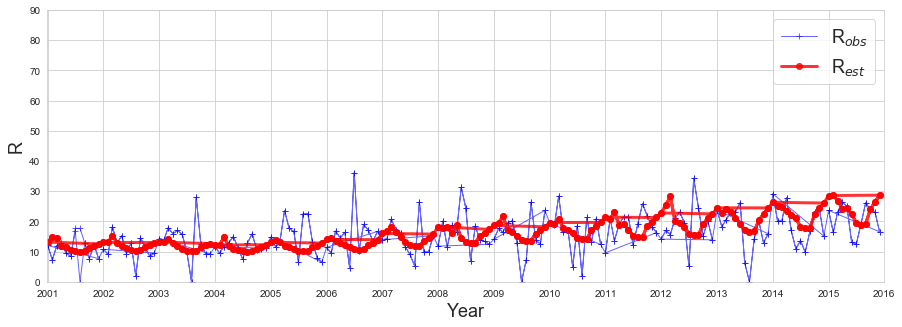

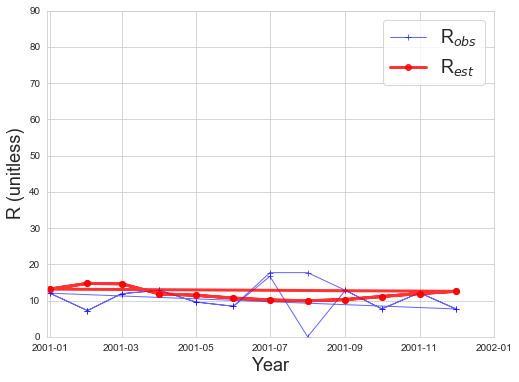

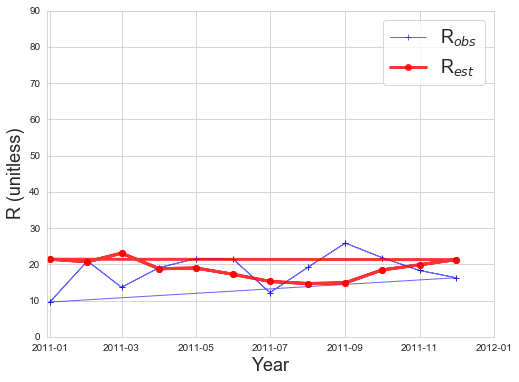

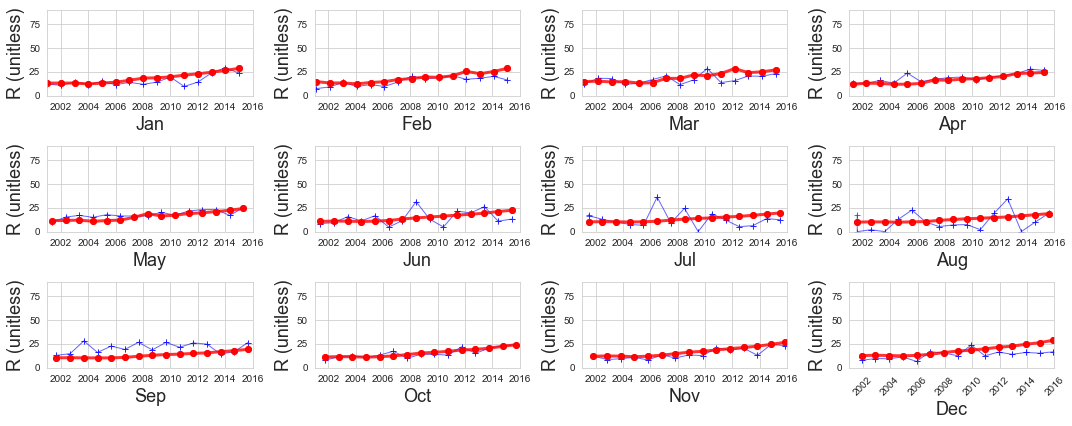

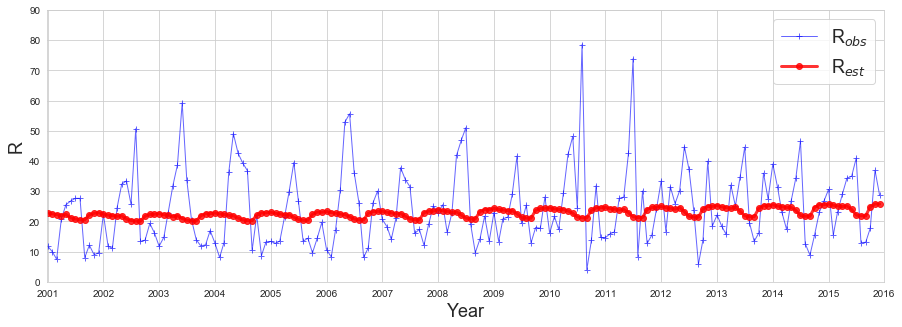

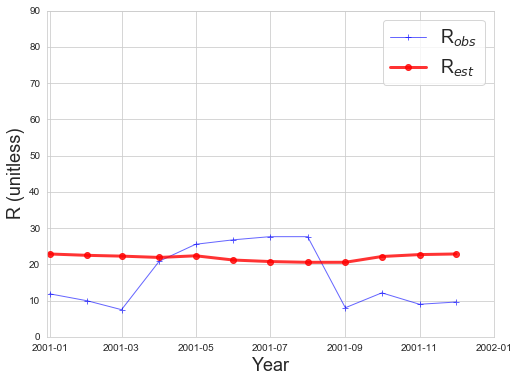

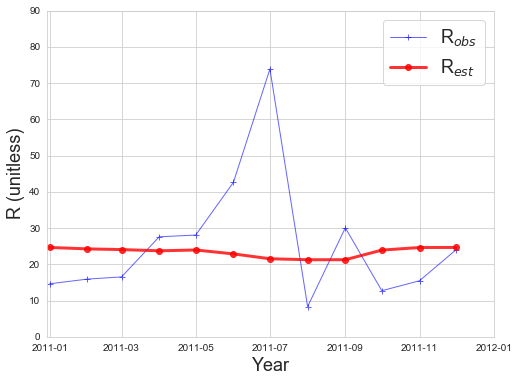

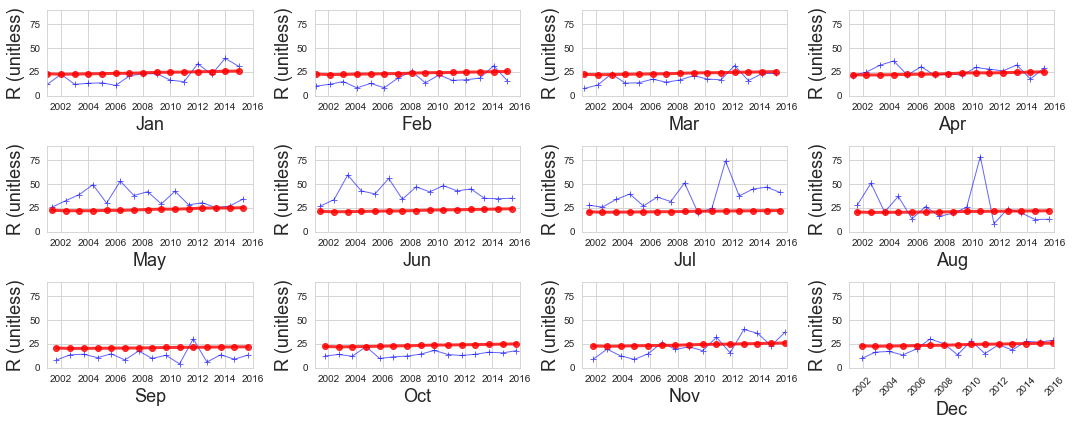

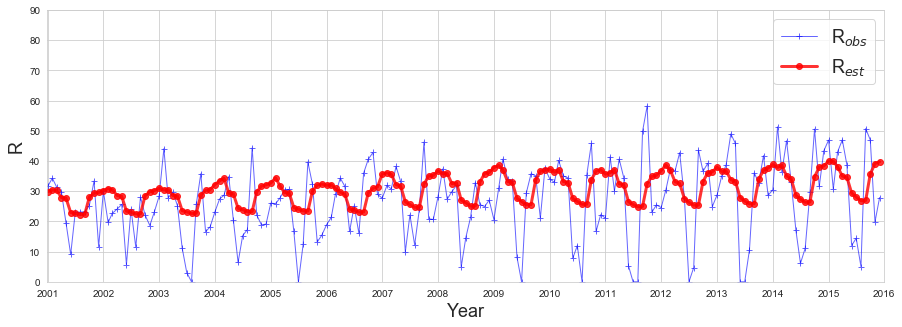

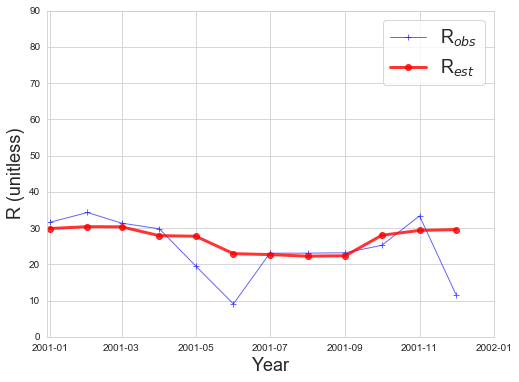

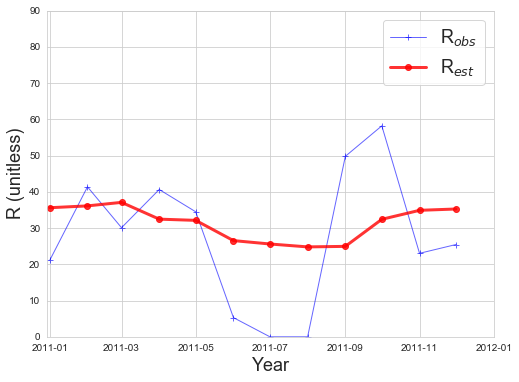

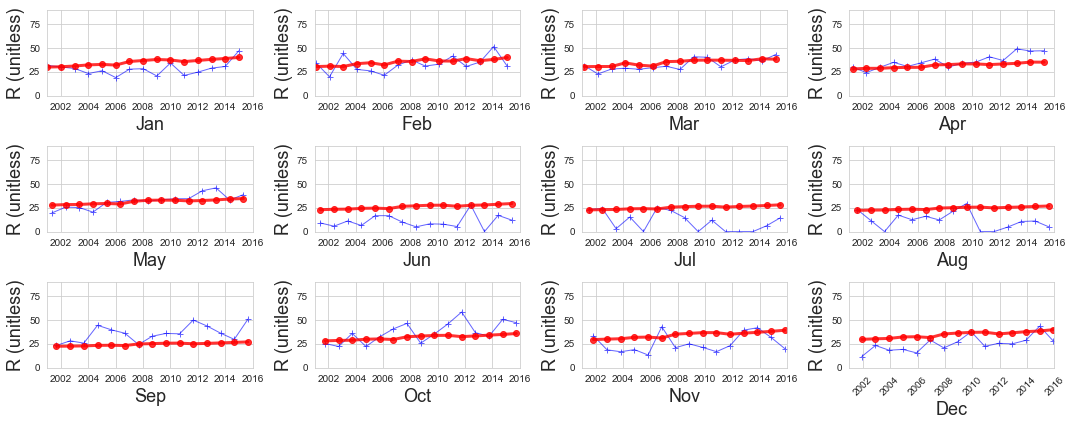

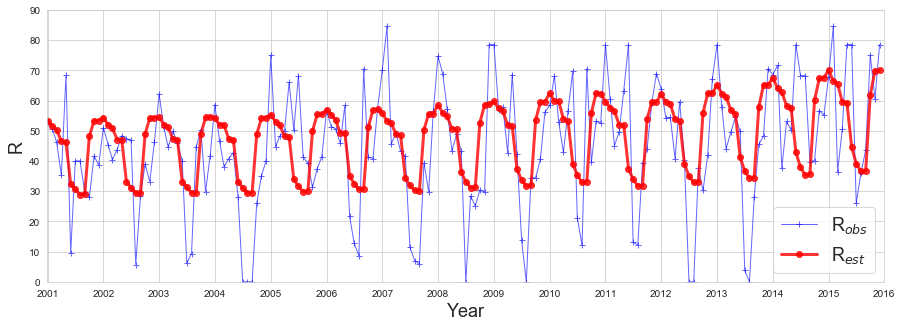

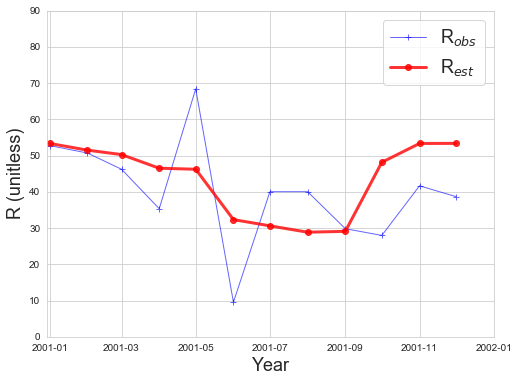

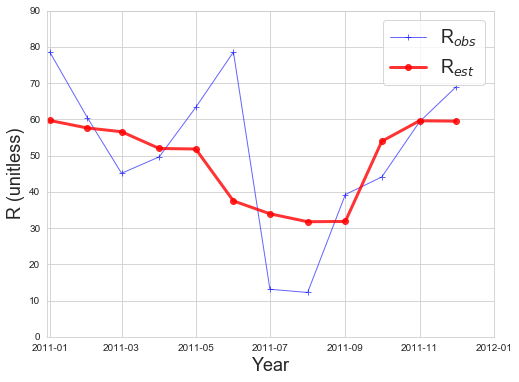

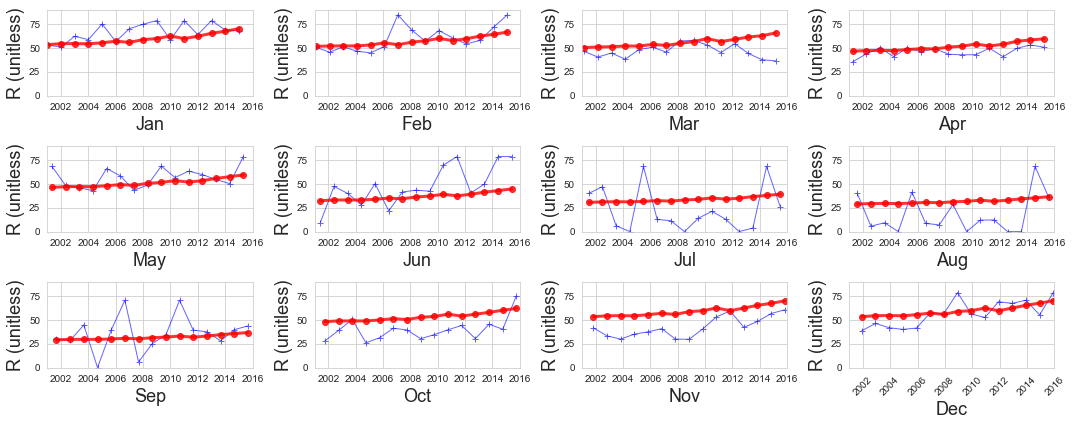

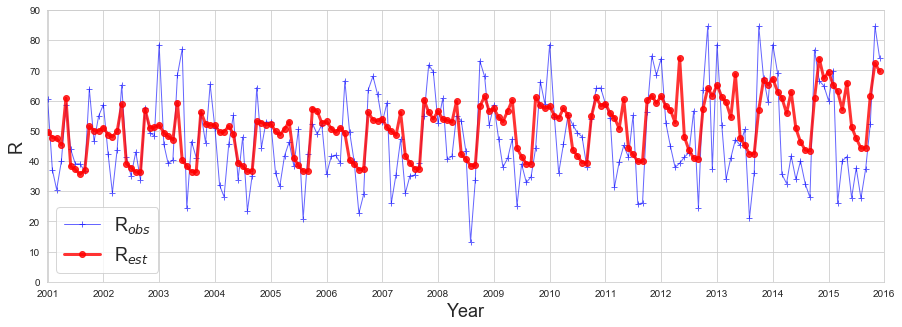

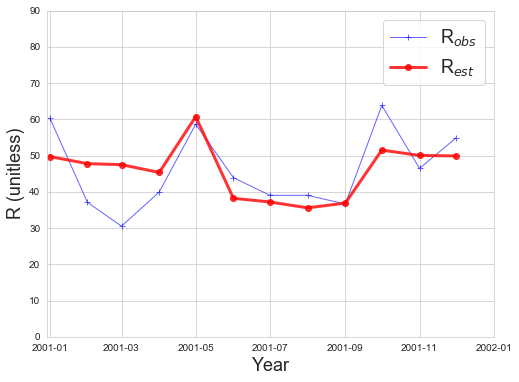

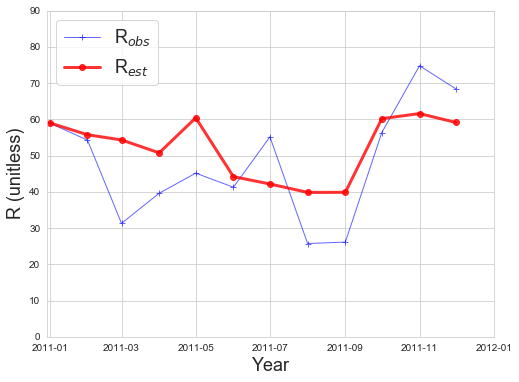

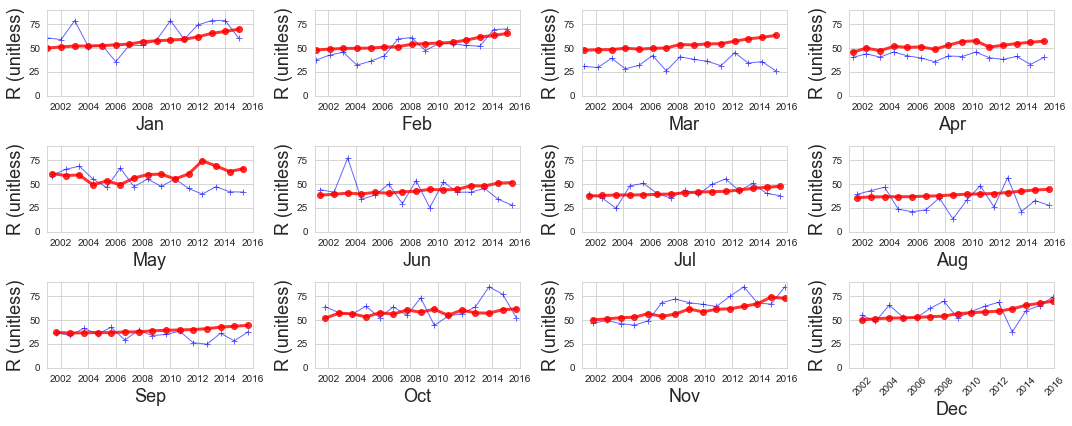

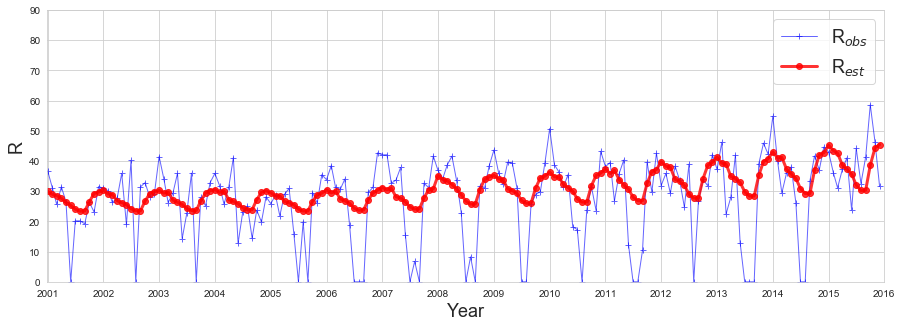

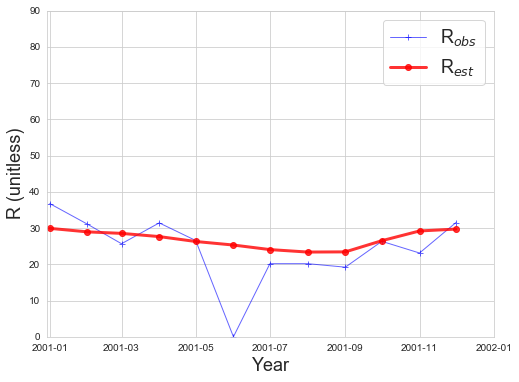

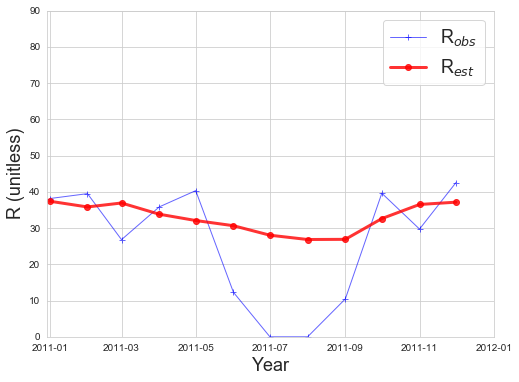

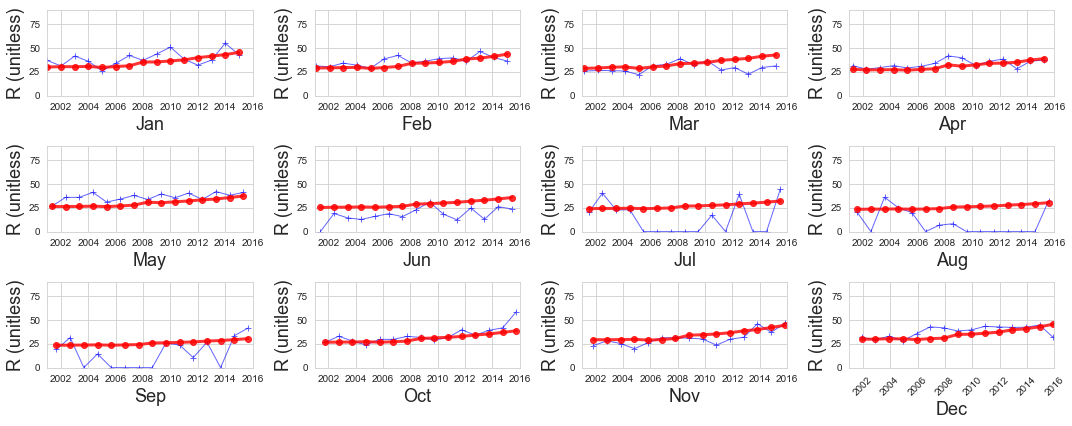

In [20]:
# for the paper

df_cityfit = pd.read_csv(fit_value_file)


df_cityfit['R_obs'] = df_cityfit['R']
df_cityfit['date1'] = pd.to_datetime(df_cityfit['date'], format="%m/%d/%Y")
df_cityfit['datei'] = pd.DatetimeIndex(df_cityfit.date1)
df_cityfit['year'] = pd.DatetimeIndex(df_cityfit.date1).year
# df_cityfit date as index
df_cityfit.set_index('date1', inplace=True)

for citychk in ind_city:
    plotfuncallyear(citychk)
    plotfunc(citychk, 2001)
    plotfunc(citychk, 2011)
    plotmonthly(citychk)
    

In [ ]:
# -----------                    OLD RUNS              --- SKIP

# ---------------------------------------------- RUN ----------------------------------------------------
#df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\fullfire1500km\allAY20180124ff1500kmmodifiedfit.csv")

#df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Codes_W\Codes_L\AQmodel\fitmodel\fittier.csv")

#df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\correctUM20180206\allAY20180204I2setfit.csv")

df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWsetfit.csv")

df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWsetcentralpixelfit.csv")

#in thesis final
df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2setfit.csv")

df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180212\allAY20180212IDW2setcentralpixelfit.csv")


df_cityfit['R_obs'] = df_cityfit['R']
df_cityfit['date1'] = pd.to_datetime(df_cityfit['date'], format="%m/%d/%Y")
df_cityfit['datei'] = pd.DatetimeIndex(df_cityfit.date1)
df_cityfit['year'] = pd.DatetimeIndex(df_cityfit.date1).year
# df_cityfit date as index
df_cityfit.set_index('date1', inplace=True)



citychk = "Kanpur"


for citychk in ind_city:
    plotfuncallyear(citychk)
    plotfunc(citychk, 2001)
    plotfunc(citychk, 2011)
    plotmonthly(citychk)



# ---------------------------------------------- RUN ----------------------------------------------------
# for ACRS 2018 with modoified format of graph

df_cityfit = pd.read_csv(r"C:\Users\prakhar\Google Drive\AQM_Research\Docs\Excel\AQmodel\fitmodel\Model_city_tier\IDW20180210\allAY20180210IDWsetfit.csv")


df_cityfit['R_obs'] = df_cityfit['R']
df_cityfit['date1'] = pd.to_datetime(df_cityfit['date'], format="%m/%d/%Y")
df_cityfit['datei'] = pd.DatetimeIndex(df_cityfit.date1)
df_cityfit['year'] = pd.DatetimeIndex(df_cityfit.date1).year
# df_cityfit date as index
df_cityfit.set_index('date1', inplace=True)

for citychk in ind_city:
    plotfuncallyear(citychk)
    plotfunc(citychk, 2001)
    plotfunc(citychk, 2011)
    plotmonthly(citychk)